In [1]:
!pip install vaderSentiment

In [3]:
import csv
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import pandas as pd
import os.path

In [4]:
# configure Session class with desired options
Session = sessionmaker()
engine = create_engine('sqlite:///twitter.db')

In [20]:
engine.table_names()

['hashtag', 'retweet', 'tweet', 'user', 'vader']

In [6]:
#VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

allTweets = pd.read_sql_query('SELECT tweet_id as id, tweet_text as text FROM tweet', engine)
print(allTweets.shape)

(17596, 2)


In [7]:
allRetweets =  pd.read_sql_query('SELECT retweet_id as id, retweet_text as text FROM retweet', engine)
print(allRetweets.shape)

(79436, 2)


In [8]:
vaderData = allTweets.append([allRetweets])
vaderData.drop_duplicates(inplace=True)
# vaderData = vaderData[:60000]
vaderData.shape

(92406, 2)

In [84]:
vaderIDs = pd.read_sql_query('SELECT id FROM vader', engine)
solo = vaderIDs.drop_duplicates()
print(solo.shape)
vaderIDs.shape

(109506, 1)


(109508, 1)

In [9]:
newVaders = pd.DataFrame(columns=['id', 'negative','neutral','positive','compound'])

In [10]:
for index, row in vaderData.iterrows():
      if(not vaderIDs['id'].isin([row['id']]).any()):
        snt = analyser.polarity_scores(row['text'])
        newVaders = newVaders.append({'id': row['id'],
                                     'negative': snt['neg'],
                                     'neutral': snt['neu'],
                                     'positive': snt['pos'],
                                     'compound': snt['compound']}, ignore_index=True)
newVaders

,id,negative,neutral,positive,compound
0,1.056095e+18,0.181,0.733,0.086,-0.4939
1,1.056126e+18,0.000,1.000,0.000,0.0000
2,1.056126e+18,0.000,0.848,0.152,0.3612
3,1.056126e+18,0.000,1.000,0.000,0.0000
4,1.056126e+18,0.000,1.000,0.000,0.0000
5,1.056126e+18,0.179,0.821,0.000,-0.5719
6,1.056139e+18,0.000,0.863,0.137,0.4019
7,1.056153e+18,0.000,0.851,0.149,0.4215
8,1.056154e+18,0.000,1.000,0.000,0.0000
9,1.056165e+18,0.000,1.000,0.000,0.0000


In [11]:
newVaders.to_sql('vader', engine, if_exists='append')

In [ ]:
# from sqlalchemy import MetaData, Table
# meta = MetaData()
# vader_tab = Table('vader', meta)
# vader_tab.drop(engine)

In [19]:
#Analyse
analyse_df = pd.read_sql_query('SELECT * FROM vader', engine)
analyse_df.shape

(92406, 6)

In [13]:
for index, row in analyse_df.iterrows():
    final_score = round(row["compound"],2) * 50 + 50
    analyse_df.at[index,'percent'] = final_score
    if(final_score<34):
        analyse_df.at[index,'mood'] = "Bad"
    elif(final_score<67):
        analyse_df.at[index,'mood'] = "Neutral"
    else:
        analyse_df.at[index,'mood'] = "Good"

In [14]:
analyse_df

,index,id,negative,neutral,positive,compound,percent,mood
0,0,1.056095e+18,0.181,0.733,0.086,-0.4939,25.5,Bad
1,1,1.056126e+18,0.000,1.000,0.000,0.0000,50.0,Neutral
2,2,1.056126e+18,0.000,0.848,0.152,0.3612,68.0,Good
3,3,1.056126e+18,0.000,1.000,0.000,0.0000,50.0,Neutral
4,4,1.056126e+18,0.000,1.000,0.000,0.0000,50.0,Neutral
5,5,1.056126e+18,0.179,0.821,0.000,-0.5719,21.5,Bad
6,6,1.056139e+18,0.000,0.863,0.137,0.4019,70.0,Good
7,7,1.056153e+18,0.000,0.851,0.149,0.4215,71.0,Good
8,8,1.056154e+18,0.000,1.000,0.000,0.0000,50.0,Neutral
9,9,1.056165e+18,0.000,1.000,0.000,0.0000,50.0,Neutral


In [15]:
%matplotlib inline

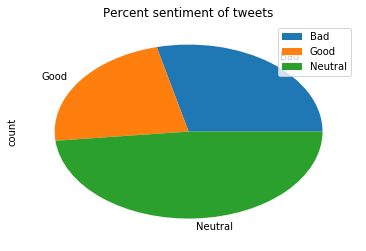

In [16]:
figure = analyse_df[['id', 'mood']].groupby(['mood']).agg(['count']).rename(columns={'id': 'amount'})
figure.plot.pie("amount", title="Percent sentiment of tweets")

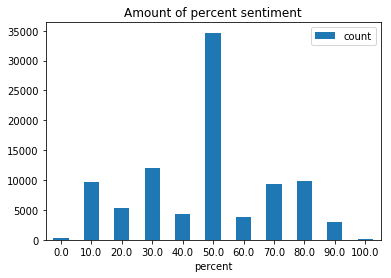

In [17]:

figure2 = analyse_df[['id', 'percent']].round({"percent": -1}).groupby(['percent']).agg(['count']).rename(columns={'id': 'amount'})
figure2.plot.bar( y='amount', rot=0, title="Amount of percent sentiment")

In [50]:
### Get Vader for this users
users = ["Patriot Gary", "Dosa"]
users_moods = pd.DataFrame(columns=["user_id", "user_name", "ID", "MOOD"])
for user in users:
    users_moods = users_moods.append(pd.read_sql_query('SELECT user.user_id, user_name, tweet.tweet_id as ID, vader.compound as MOOD \
FROM user \
JOIN tweet ON tweet.user_id = user.user_id \
JOIN vader ON tweet.tweet_id = vader.id \
WHERE user_name = "' + user + '" \
UNION \
SELECT user.user_id, user_name, retweet.retweet_id as ID, vader.compound as MOOD \
FROM user \
JOIN vader ON retweet.retweet_id = vader.id \
JOIN retweet ON retweet.user_id = user.user_id \
WHERE user_name = "' + user + '"', engine))
users_moods

,user_id,user_name,ID,MOOD
0,838114538868342787,Patriot Gary,1056883610144440320,0.0000
1,838114538868342787,Patriot Gary,1057016601998958592,-0.1779
2,838114538868342787,Patriot Gary,1057016716197212160,0.3182
3,838114538868342787,Patriot Gary,1057016983907115008,0.5093
4,838114538868342787,Patriot Gary,1057021319752101888,0.4968
5,838114538868342787,Patriot Gary,1057021516246892544,0.0000
6,838114538868342787,Patriot Gary,1057025427754156032,-0.7906
7,838114538868342787,Patriot Gary,1057313090587557888,0.0000
8,838114538868342787,Patriot Gary,1057350393779363840,0.0000
9,838114538868342787,Patriot Gary,1057386987961925632,-0.7734


In [52]:
average_user = users_moods[['user_name', 'MOOD']].groupby(['user_name']).agg(['mean','max', 'min'])
average_user

MOOD                
                  mean     max     min
user_name                             
Dosa         -0.299553  0.5859 -0.6369
Patriot Gary -0.030954  0.5859 -0.7906

In [18]:
# associate it with our custom Session class
Session.configure(bind=engine)